## Final Project Submission

Please fill out:
* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


This file:
**Student_2_Questions.jpynb**


## Answering Questions

As a reminder, here are the questions posed in the last notebook:

1. Are waterfront properties significantly more expensive?
2. Are newer homes more expensive?
3. What impacts price more, square footage of living space or number of bedrooms?

### Import a bunch of libraries

There are a bunch of libraries that are used in this project. They are imported and aliased below.

In [2]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

#STATSMODELS

#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#SCIKIT LEARN

#metrics
#from sklearn.metrics import mean_squared_error

#linear regression
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#label encoding
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#create dummy variables
#from sklearn.preprocessing import LabelBinarizer
#lb_bin = LabelBinarizer()

#recursive feature elimination
#from sklearn.feature_selection import RFE

#train test split
#from sklearn.model_selection import train_test_split

#k-fold cross validation
#from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

#### Read in DataFrame from pickle file

In [4]:
with open('data.pickle','rb') as f:
    data = pickle.load(f)
    
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_981,has_basement,yr_renovated_new
count,2.096300e+04,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000
mean,5.154048e+05,3.355102,2.088012,2032.599389,10750.234270,1.488360,0.004675,3.411153,7.614607,1749.281925,1970.785384,1972.678338,98078.731384,47.560797,-122.217000,1962.964080,9979.023184,0.423365,0.383247,1972.678338
std,2.830298e+05,0.879990,0.732954,834.998842,13638.141655,0.539631,0.068215,0.649884,1.119503,769.590305,29.371643,28.971475,53.656112,0.138196,0.138392,662.339591,11795.111734,0.494104,0.486189,28.971475
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.000000,0.000000,1900.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,1954.000000,98033.000000,47.472750,-122.330000,1480.000000,5054.000000,0.000000,0.000000,1954.000000
50%,4.470000e+05,3.000000,2.250000,1890.000000,7500.000000,1.500000,0.000000,3.000000,7.000000,1540.000000,1974.000000,1977.000000,98070.000000,47.571900,-122.235000,1820.000000,7536.000000,0.000000,0.000000,1977.000000
75%,6.300000e+05,4.000000,2.500000,2500.000000,10275.000000,2.000000,0.000000,4.000000,8.000000,2160.000000,1996.000000,1998.000000,98118.000000,47.678850,-122.129000,2330.000000,9870.000000,1.000000,1.000000,1998.000000
max,1.990000e+06,7.000000,5.000000,5990.000000,149410.000000,3.500000,1.000000,5.000000,13.000000,5990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,149410.000000,1.000000,1.000000,2015.000000


Pickle is amazing I must say.

### Question 1 - Waterfront Property

Are waterfront properties significantly more expensive?

Unfortunately, when I posed this question, I did not realize that the DataFrame would contain so few records for waterfront property. I am not going to use this field in my model as a result, but I will do some analysis here for the sake of the question.

In [22]:
#create dataFrame with only waterfront and price
waterfront_df = data.loc[:,['waterfront', 'price']]

In [28]:
waterfront_df.corr()

,waterfront,price
waterfront,1.000000,0.145956
price,0.145956,1.000000


Looks like a weak positive correlation with waterfront. Again, the records marked as waterfrot are very little. So, this is more of an exercise to see what we get.

Median
waterfront
0     445000.0
1    1150000.0
Name: price, dtype: float64

Count
waterfront
0    20865
1       98
Name: price, dtype: int64


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


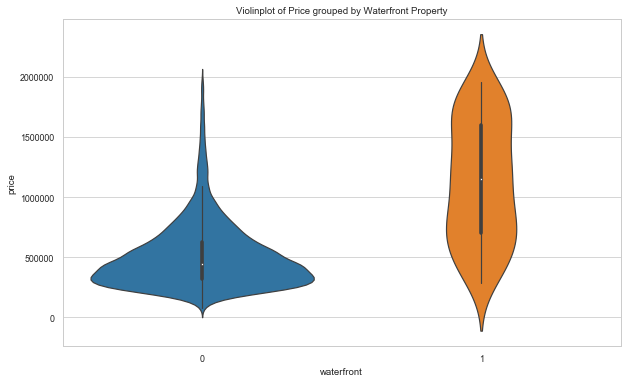

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(x='waterfront',y='price',data=waterfront_df)
plt.title("Violinplot of Price grouped by Waterfront Property")
print("Median")
print(waterfront_df.groupby('waterfront')['price'].median())
print("\nCount")
print(waterfront_df.groupby('waterfront')['price'].count())

It's a cool looking plot. Waterfront property skews higher in price.

Will run a quick ols regression to see what the regression results are:

In [32]:
#OLS Regression
f = 'price~waterfront'
model = ols(formula=f, data=waterfront_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     456.3
Date:                Thu, 30 May 2019   Prob (F-statistic):          3.67e-100
Time:                        17:25:32   Log-Likelihood:            -2.9267e+05
No. Observations:               20963   AIC:                         5.854e+05
Df Residuals:                   20961   BIC:                         5.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.126e+05   1938.463    264.423      0.000    5.09e+05    5.16e+05
waterfront  6.056e+05   2.84e+04     21.360      0.000     5.5e+05    6.61e+05
==============================================================================
Omnibus:                     7020.274   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24274.495
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       7.039   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 1 - Discussion / Answer

The low p-value (0 in this case) indicates that the coefficients are statistically significant. The high F-statistic would indicate that the model is better than going with straight average for price as a predictor.

However, the R-squared is pretty awful. I suppose this makes perfect sense since home prices are based on many other things than just whether the property is waterfront. I am currently unsure how to go about showing a proper QQ plot for a categorical variable. 

## Question 2 - Newer Homes

2. Are newer homes more expensive?

For this, I will have to look at the yr_built field.

In [21]:
#create dataFrame with only yr_built and price
yr_built_df = data.loc[:,['yr_built', 'price']]

In [31]:
yr_built_df.corr()

,yr_built,price
yr_built,1.000000,0.053003
price,0.053003,1.000000


Year built is hardly correlated with price at all. Looks to be that newer homes are not more expensive... or at the very least they are very weakly positively correlated with price.

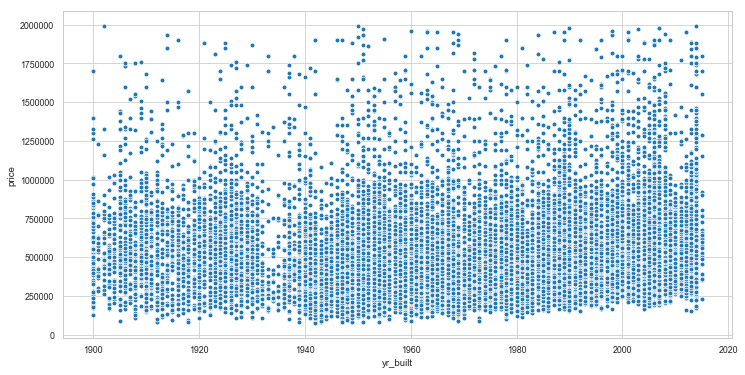

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=yr_built_df['yr_built'], y=yr_built_df['price'])

It doesn't really look like there is a strong relationship, if any relationship at all.

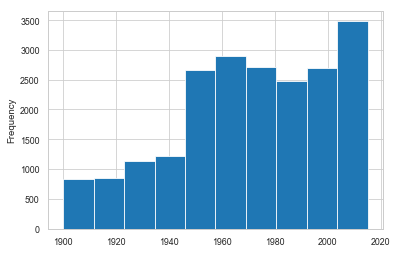

In [27]:
yr_built_df['yr_built'].plot.hist()

I didn't expect the distribution of homes by year to be a normal distribution. This is an expected distribution based on the city growing over the course of 120 years.

In [48]:
#TRy normalizing the data:

#Min Max Scaler
def min_max_scaler(X):
    """
    X is a NumPy array. Will return min-max scaled array from 0 to 1. 
    x' = x-min(x) / max(x)-min(x)
    """
    min_x = np.min(X)
    max_x = np.max(X)
    return (X - min_x) / (max_x - min_x)

Will run a quick OLS regression to see what pops out.

In [56]:
#OLS Regression
f = 'price~yr_built'
model = ols(formula=f, data=yr_built_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     59.05
Date:                Thu, 30 May 2019   Prob (F-statistic):           1.60e-14
Time:                        18:06:51   Log-Likelihood:            -2.9287e+05
No. Observations:               20963   AIC:                         5.857e+05
Df Residuals:                   20961   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.912e+05   1.31e+05     -3.749      0.000   -7.48e+05   -2.34e+05
yr_built     510.7476     66.464      7.685      0.000     380.473     641.022
==============================================================================
Omnibus:                     7279.048   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25885.181
Skew:                           1.751   Prob(JB):                         0.00
Kurtosis:                       7.169   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So surprisingly the p-value is zero. The model indicates that there are problems though.